In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "mathtext.fontset": "dejavuserif",
    "mathtext.rm": "DejaVu Serif",
    "axes.unicode_minus": False
})


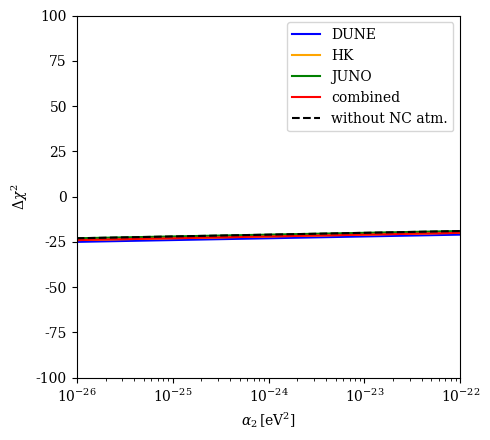

In [26]:
# Dummy data
alpha2 = np.logspace(-26, -22, 500)
delta_chi2_dune = np.log10(alpha2) + 1
delta_chi2_hk = np.log10(alpha2) + 2
delta_chi2_juno = np.log10(alpha2) + 3
delta_chi2_combined = (delta_chi2_dune + delta_chi2_hk + delta_chi2_juno) / 3
delta_chi2_combined_dashed = delta_chi2_combined + 1

# Plot
fig, ax = plt.subplots(figsize=(5, 4.5))

ax.plot(alpha2, delta_chi2_dune, label='DUNE', color='blue')
ax.plot(alpha2, delta_chi2_hk, label='HK', color='orange')
ax.plot(alpha2, delta_chi2_juno, label='JUNO', color='green')
ax.plot(alpha2, delta_chi2_combined, label='combined', color='red')
ax.plot(alpha2, delta_chi2_combined_dashed, label='without NC atm.', color='black', linestyle='dashed')

ax.set_xscale('log')
ax.set_xlim(1e-26, 1e-22)
ax.set_ylim(-100, 100)



# Set labels
ax.set_xlabel(r'$\alpha_2 \, [\mathrm{eV}^2]$')
ax.set_ylabel(r'$\Delta \chi^2$')

# Legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

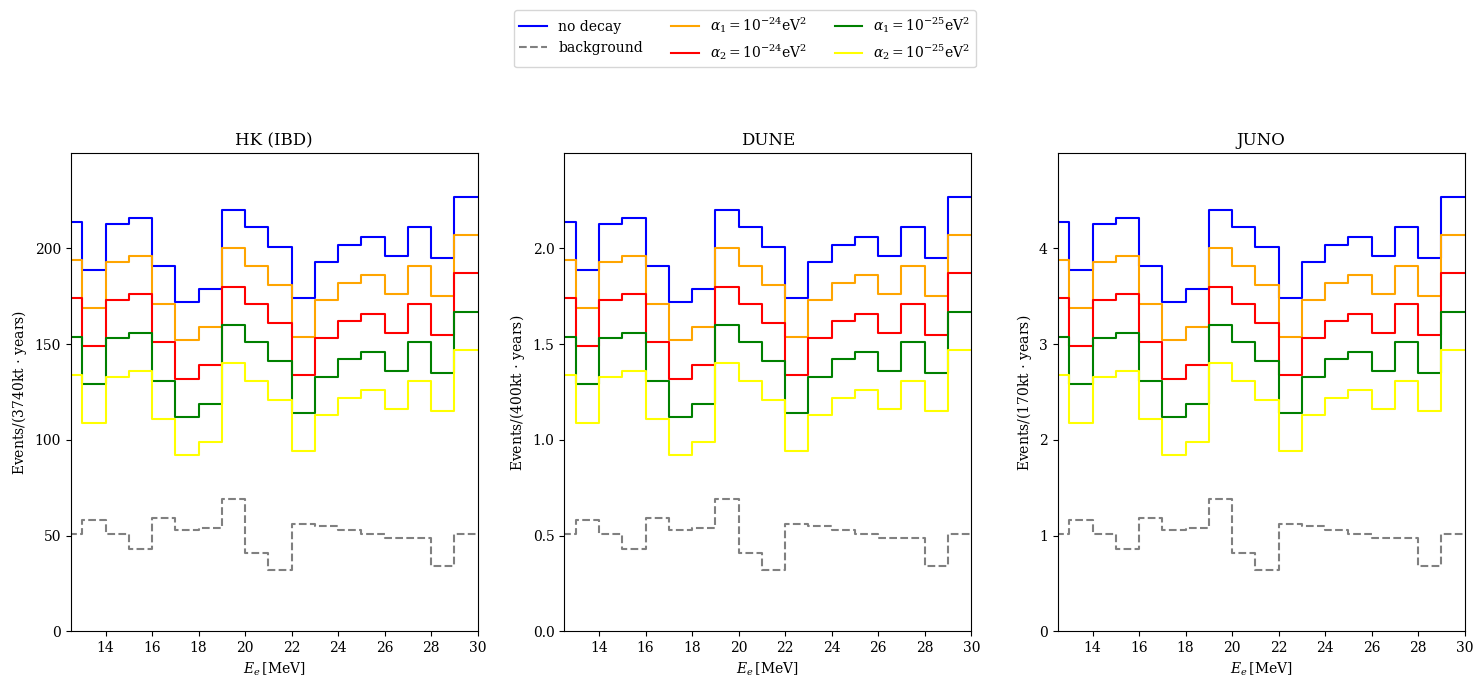

In [36]:
# Dummy data
E_e = np.arange(12, 31, 1)
events_no_decay = np.random.poisson(lam=200, size=len(E_e))
events_background = np.random.poisson(lam=50, size=len(E_e))
events_alpha1_10_24 = events_no_decay - 20
events_alpha2_10_24 = events_no_decay - 40
events_alpha1_10_25 = events_no_decay - 60
events_alpha2_10_25 = events_no_decay - 80

# Plot settings
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=False)
# fig.suptitle(r'DIFFUSE SUPERNOVA NEUTRINO BACKGROUND', fontsize=16)

# Titles and data for each subplot
titles = ['HK (IBD)', 'DUNE', 'JUNO']
datasets = [
    (events_no_decay, events_background, events_alpha1_10_24, events_alpha2_10_24, events_alpha1_10_25, events_alpha2_10_25),
    (events_no_decay / 100, events_background / 100, events_alpha1_10_24 / 100, events_alpha2_10_24 / 100, events_alpha1_10_25 / 100, events_alpha2_10_25 / 100),
    (events_no_decay / 50, events_background / 50, events_alpha1_10_24 / 50, events_alpha2_10_24 / 50, events_alpha1_10_25 / 50, events_alpha2_10_25 / 50)
]
y_labels = [
    r'Events/(3740kt $\cdot$ years)',
    r'Events/(400kt $\cdot$ years)',
    r'Events/(170kt $\cdot$ years)'
]

# Colors and labels for the different lines
colors = ['blue', 'gray', 'orange', 'red', 'green', 'yellow']
labels = [r'no decay', r'background', r'$\alpha_1 = 10^{-24} \mathrm{eV}^2$', r'$\alpha_2 = 10^{-24} \mathrm{eV}^2$', r'$\alpha_1 = 10^{-25} \mathrm{eV}^2$', r'$\alpha_2 = 10^{-25} \mathrm{eV}^2$']

# Plot each dataset in a subplot
lines = []
for ax, title, data, ylabel in zip(axs, titles, datasets, y_labels):
    line1, = ax.step(E_e, data[0], label=labels[0], color=colors[0])
    line2, = ax.step(E_e, data[1], label=labels[1], color=colors[1], linestyle='dashed')
    line3, = ax.step(E_e, data[2], label=labels[2], color=colors[2])
    line4, = ax.step(E_e, data[3], label=labels[3], color=colors[3])
    line5, = ax.step(E_e, data[4], label=labels[4], color=colors[4])
    line6, = ax.step(E_e, data[5], label=labels[5], color=colors[5])
    
    ax.set_title(title)
    ax.set_xlabel(r'$E_e \, [\mathrm{MeV}]$')
    ax.set_ylabel(ylabel)
    ax.set_xlim(12.5, 30)
    ax.set_ylim(0, max(data[0])*1.1)
    
    lines.extend([line1, line2, line3, line4, line5, line6])

fig.legend(lines[:6], labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.15))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()